In [4]:
import pandas as pd
stuPer = pd.read_csv("StudentsPerformance.csv")
stuPer.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


We are going to take a look at the relations between parental level of education and lunch, gender and test preparation course and last but not least at parental level of education and test preparation course. Please keep in mind that all findings are based on statistical analysis of the results from our dataset of around 1000 students. The results do not have to apply to all students.

First let's see if there is a relation between gender and test prep course completion.

In [5]:
contingencyTable = stuPer.groupby(['gender','test preparation course']).size().unstack('gender', fill_value=0)
contingencyTable

gender,female,male
test preparation course,,
completed,184,174
none,334,308


<AxesSubplot:xlabel='test preparation course'>

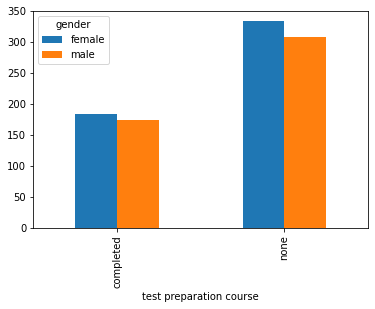

In [6]:
contingencyTable.plot(kind='bar')

A slight inconvenience here is that there were more female students than male students within the dataset, this makes it hard for us to see if there is a percentage difference between the male and female students and their test preparation.

In [7]:
print("Amount of female students: ")
print(184 + 334)
print("Amount of male students: ")
print(174 + 308)
print("Percentage female students that completed the course:")
print(184/(184 + 334)*100)
print("Percentage male students that completed the course:")
print(174/(174 + 308)*100)

Amount of female students: 
518
Amount of male students: 
482
Percentage female students that completed the course:
35.521235521235525
Percentage male students that completed the course:
36.09958506224066


So instead of what the plot shows us, more male than female students in percentage terms completed the test preparation course.

In [8]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(0.015529201882465886,
 0.9008273880804724,
 1,
 array([[185.444, 172.556],
        [332.556, 309.444]]))

There is a 10% chance a correlation between 

Now let us find out if parental level of education has effect on the lunch you'll eat before taking a test.

In [19]:
contingencyTable = stuPer.groupby(['parental level of education','lunch']).size().unstack('parental level of education', fill_value=0)
contingencyTable

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
lunch,,,,,,
free/reduced,77,44,70,24,79,61
standard,145,74,126,35,147,118


<AxesSubplot:xlabel='lunch'>

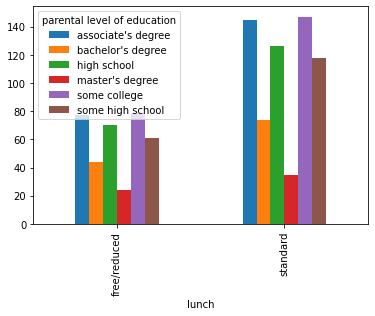

In [20]:
contingencyTable.plot(kind='bar')

In [22]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(1.1112675079168055,
 0.9531014927218224,
 5,
 array([[ 78.81 ,  41.89 ,  69.58 ,  20.945,  80.23 ,  63.545],
        [143.19 ,  76.11 , 126.42 ,  38.055, 145.77 , 115.455]]))

The chi2 test tells us that there is a 4.7 % chance a correlation between the parental level of education and the type of lunch exists. So it is almost definitely no relation. 

Finally we will look at parental level of education vs test preparation course

In [23]:
contingencyTable = stuPer.groupby(['parental level of education','test preparation course']).size().unstack('parental level of education', fill_value=0)
contingencyTable

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
test preparation course,,,,,,
completed,82,46,56,20,77,77
none,140,72,140,39,149,102


<AxesSubplot:xlabel='test preparation course'>

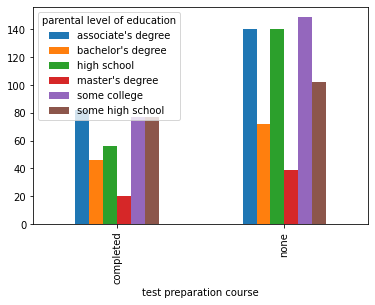

In [24]:
contingencyTable.plot(kind='bar')

In [25]:
from scipy.stats import chi2_contingency
chi2_contingency(contingencyTable)

(9.54407054307069,
 0.08923388625809343,
 5,
 array([[ 79.476,  42.244,  70.168,  21.122,  80.908,  64.082],
        [142.524,  75.756, 125.832,  37.878, 145.092, 114.918]]))

The chi2 test gives us a 91.1% chance a relation between the parental level of education and the test preaparation, this is not a significant outcome, so we can't say for sure a relation between them exists, but it would be worth further investigation because maybe the sample size is just too small and by taking a larger sample or collecting more data we can make sure everyone feels the same motivation to do these test preparation courses unregarded their parental level of education.